Members: Adriatico, Du, Pacampara, Pan, Perez, Restauro 

In [3]:
# Importing needed modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster

# To address warning i.e. memory leak on Windows with the Intel Math Kernel Library (MKL)
import os
os.environ['OMP_NUM_THREADS'] = '1'

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

**Part I - Importing the Dataset**

       CustomerID         Age      Income  Spending Score
count  200.000000  200.000000  200.000000      200.000000
mean   100.500000   38.850000   60.560000       50.200000
std     57.879185   13.969007   26.264721       25.823522
min      1.000000   18.000000   15.000000        1.000000
25%     50.750000   28.750000   41.500000       34.750000
50%    100.500000   36.000000   61.500000       50.000000
75%    150.250000   49.000000   78.000000       73.000000
max    200.000000   70.000000  137.000000       99.000000


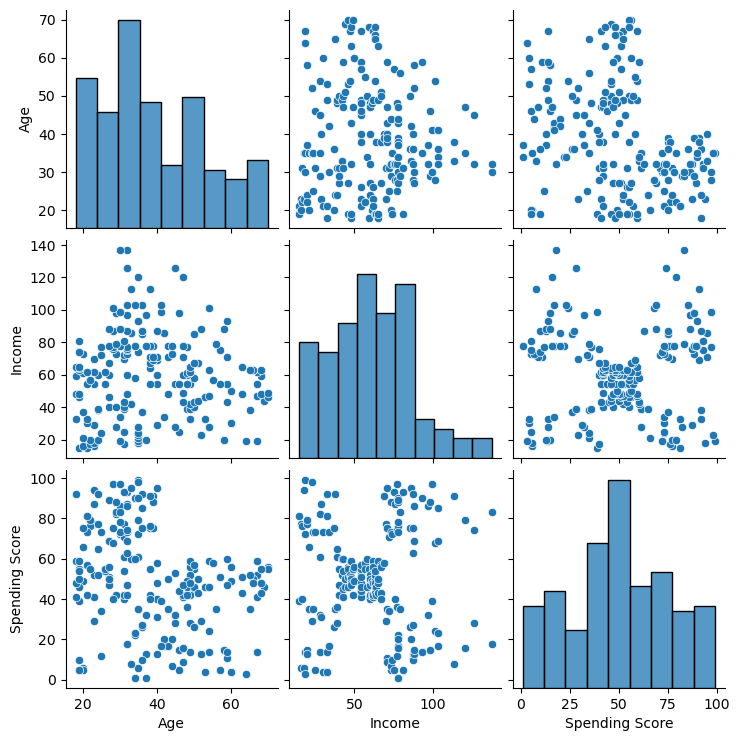

In [4]:
# Load data into Pandas DataFrame
df = pd.read_csv("Mall_Customers-1.csv");

# Rename columns Annual Income (k$) and Spending Score (1-100) to Income and Spending Score, respectively
df = df.rename(columns = {"Annual Income (k$)": "Income", "Spending Score (1-100)" : "Spending Score"})

# Give the summary of the statistics of the data
print(df.describe())

# Provide a pairplot between Age, Income and Spending Score
filtered_df = ["Age", "Income", "Spending Score"]
sns.pairplot(df[filtered_df])

**Part II - Perform K-meaan Cluster to Spending Score vs Income plot with 5 clusters**

In [22]:
selected_columns = df[["Income", "Spending Score"]]

# Optional: Apply feature scaling for better results
# Check the mean and standard deviation before standardization
# for col in selected_columns.columns:
#     mean = selected_columns[col].mean()
#     std = selected_columns[col].std()
#     print(f"Before Standardization - {col}: Mean = {mean}, Std Dev = {std}")

# Apply standardization
# X = selected_columns.values
# Xp = np.copy(X)

# for i in range(X.shape[1]):
#     Xp[:, i] = (X[:, i] - X[:, i].mean()) / X[:, i].std()

# Check the mean and standard deviation after standardization
# for i, col in enumerate(selected_columns.columns):
#     mean = Xp[:, i].mean()
#     std = Xp[:, i].std()
#     print(f"After Standardization - {col}: Mean = {mean}, Std Dev = {std}")

# print(Xp)

# Initialize K-means clustering with 5 clusters
kmeans = cluster.KMeans(n_clusters=5, random_state = 0)

# Fit the model to the scaled data
# kmeans.fit(Xp)
# print(Xp)

# Fit the model to the data
kmeans.fit(selected_columns)

# Print the cluster centers
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i + 1}: (Income={center[0]}, Spending Score={center[1]})")

Cluster Centers:
Cluster 1: (Income=55.29629629629632, Spending Score=49.51851851851852)
Cluster 2: (Income=86.53846153846155, Spending Score=82.12820512820511)
Cluster 3: (Income=88.20000000000002, Spending Score=17.1142857142857)
Cluster 4: (Income=26.304347826086982, Spending Score=20.913043478260867)
Cluster 5: (Income=25.727272727272755, Spending Score=79.36363636363636)


**Part III - Attach Cluster to the Original Data**

In [23]:
# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_
print(df)

# Count the number of samples in each cluster
cluster_counts = df['Cluster'].value_counts()

print("Cluster Counts:")
print(cluster_counts)

     CustomerID  Gender  Age  Income  Spending Score  Cluster
0             1    Male   19      15              39        3
1             2    Male   21      15              81        4
2             3  Female   20      16               6        3
3             4  Female   23      16              77        4
4             5  Female   31      17              40        3
..          ...     ...  ...     ...             ...      ...
195         196  Female   35     120              79        1
196         197  Female   45     126              28        2
197         198    Male   32     126              74        1
198         199    Male   32     137              18        2
199         200    Male   30     137              83        1

[200 rows x 6 columns]
Cluster Counts:
0    81
1    39
2    35
3    23
4    22
Name: Cluster, dtype: int64


**Part IV - Plot Cluster on Chart**

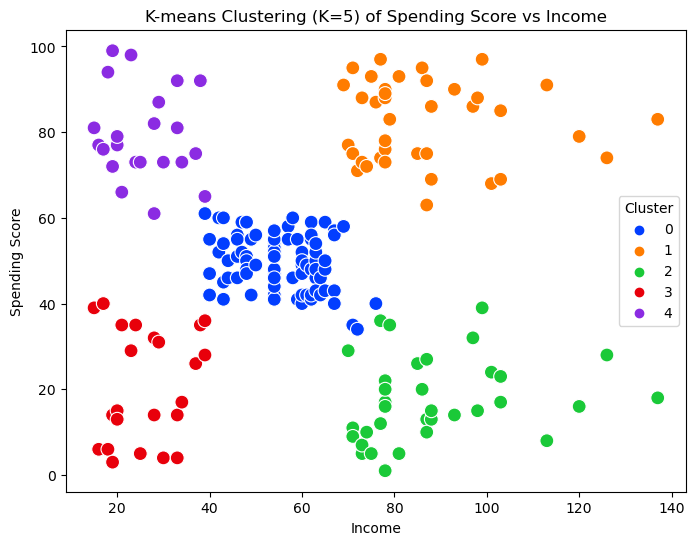

In [24]:
# Create a scatterplot with cluster colors
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Spending Score', hue='Cluster', palette='bright', s=100)
plt.title('K-means Clustering (K=5) of Spending Score vs Income')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()